In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
data=pd.read_csv(r"C:\Users\HP\Desktop\Machine Learning\Datasets\globalterrorism.csv",encoding="latin-1")
data.sample(5)

C:\Users\HP\AppData\Local\Temp\ipykernel_4496\1971698434.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv(r"C:\Users\HP\Desktop\Machine Learning\Datasets\globalterrorism.csv",encoding="latin-1")


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
138456,201409290016,2014,9,29,2014-09-29 00:00:00,0,NaN,228,Yemen,10,...,NaN,"""Yemen: Open Source Security Highlights 30 Sep...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
144283,201502110033,2015,2,11,NaN,0,NaN,160,Philippines,5,...,NaN,"""Village chief slain,"" Tempo, February 13, 2015.",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
141713,201412190006,2014,12,17,NaN,0,NaN,45,Colombia,3,...,NaN,"""Colombia's Trasandino oil pipeline shut by re...","""Colombia Guerrilla Update: ELN Rebels Murder ...",NaN,START Primary Collection,0,0,0,0,NaN
127325,201402140059,2014,2,14,2014-02-14 00:00:00,0,NaN,95,Iraq,10,...,NaN,"""1 army officer, 1 soldier hurt in Kirkuk,"" As...","""Gunmen kill a policeman, wound an army office...",NaN,START Primary Collection,0,1,0,1,NaN
104660,201112210029,2011,12,21,NaN,0,NaN,205,Thailand,5,...,NaN,"""Roundup: Two people killed, over 20 wounded i...",NaN,NaN,START Primary Collection,0,0,0,0,NaN


In [4]:
data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'State','region_txt':'Region','attacktype1_txt':'Attack_Type','nkill':'Killed','target1':'Target','nwound':'Wounded','summary':'Summary','gname':'Group_Name','target1':'Target_Type','weaptype1_txt':'Weapon_Type','motive':'Motive'},inplace = True)

In [5]:
# Taking only those data which usable for analysis..
data=data[['Year','Month','Day','Country','State','Region','city','latitude','longitude','Attack_Type','Killed','Wounded','Target_Type','Summary','Group_Name','Weapon_Type','Motive']]

In [6]:
data.sample(5)

,Year,Month,Day,Country,State,Region,city,latitude,longitude,Attack_Type,Killed,Wounded,Target_Type,Summary,Group_Name,Weapon_Type,Motive
132730,2014,5,31,Ukraine,Donetsk,Eastern Europe,Donetsk,47.981647,37.762325,Armed Assault,3.0,0.0,Donetsk Sergey Prokofiev International Airport,05/31/2014: Assailants attempted to storm the ...,Donetsk People's Republic,Firearms,The Donetsk People's Republic claimed responsi...
180408,2017,11,12,Afghanistan,Uruzgan,South Asia,Tarin Kot,32.617970,65.872375,Bombing/Explosion,1.0,3.0,Officers,11/12/2017: An explosive device detonated targ...,Unknown,Explosives,NaN
12237,1980,11,5,El Salvador,La Libertad,Central America & Caribbean,Santa Tecla,13.676944,-89.279722,Bombing/Explosion,NaN,NaN,store,NaN,Unknown,Explosives,NaN
120869,2013,9,3,Somalia,Lower Shebelle,Sub-Saharan Africa,Merca,1.716188,44.768864,Assassination,0.0,1.0,President: Hassan Sheikh Mohamoud,09/03/2013: Assailants ambushed Hassan Sheikh ...,Al-Shabaab,Explosives,"The specific motive is unknown; however, sourc..."
148254,2015,5,18,Afghanistan,Uruzgan,South Asia,Khas Uruzgan district,32.928519,66.688756,Armed Assault,1.0,NaN,Post,05/18/2015: Assailants opened fire on a police...,Taliban,Firearms,NaN


In [7]:
data.shape

(181691, 17)

In [8]:
data.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
State             421
Region              0
city              435
latitude         4556
longitude        4557
Attack_Type         0
Killed          10313
Wounded         16311
Target_Type       638
Summary         66129
Group_Name          0
Weapon_Type         0
Motive         131130
dtype: int64

* There are a lot of null values.

In [9]:
import seaborn as sns

In [10]:
import matplotlib.pyplot as plt

<Axes: title={'center': 'Attacks by YEAR'}, xlabel='Year', ylabel='count'>

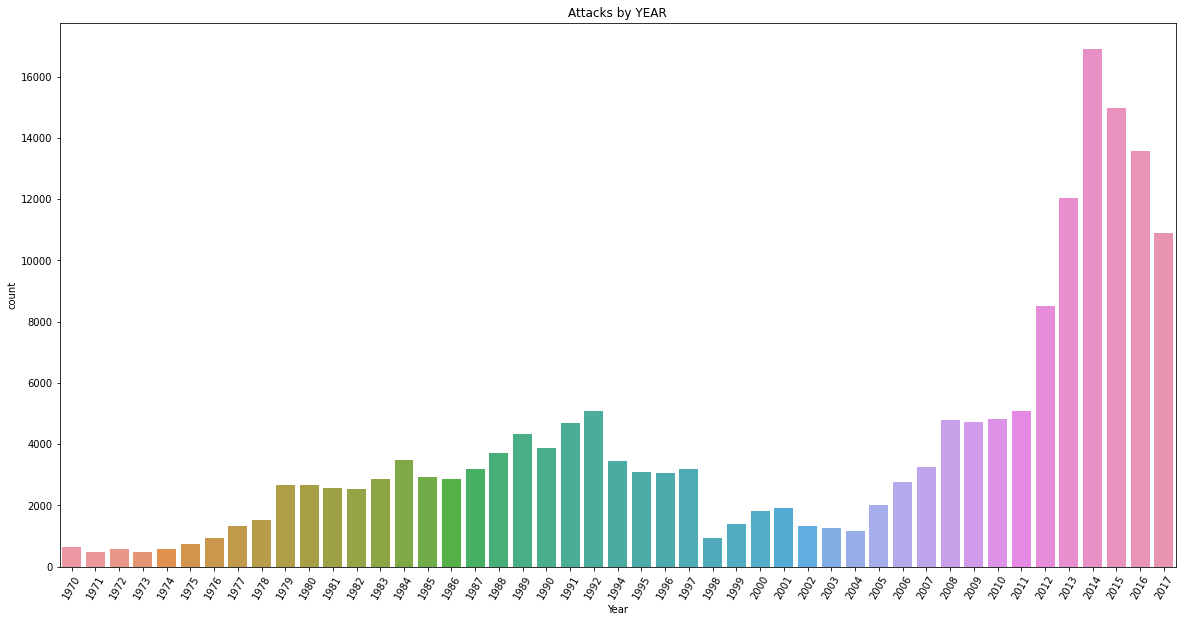

In [11]:
## EDA
plt.figure(figsize=(20,10))
plt.xticks(rotation = 60)
plt.title('Attacks by YEAR')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
sns.countplot(x=data.Year)

<Axes: title={'center': 'Attacks by MONTH'}, xlabel='Month', ylabel='count'>

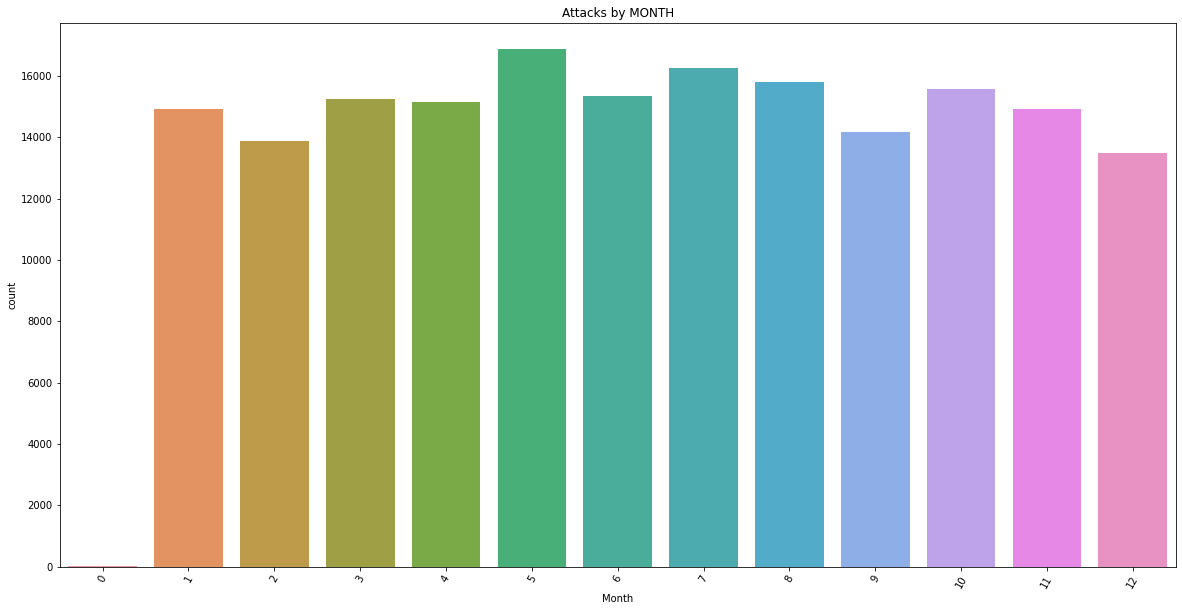

In [12]:
plt.figure(figsize=(20,10))
plt.xticks(rotation = 60)
plt.title('Attacks by MONTH')
plt.xlabel('Month')
plt.ylabel('Number of Attacks')
sns.countplot(x=data.Month)

<Axes: title={'center': 'Attacks by DAY'}, xlabel='Day', ylabel='count'>

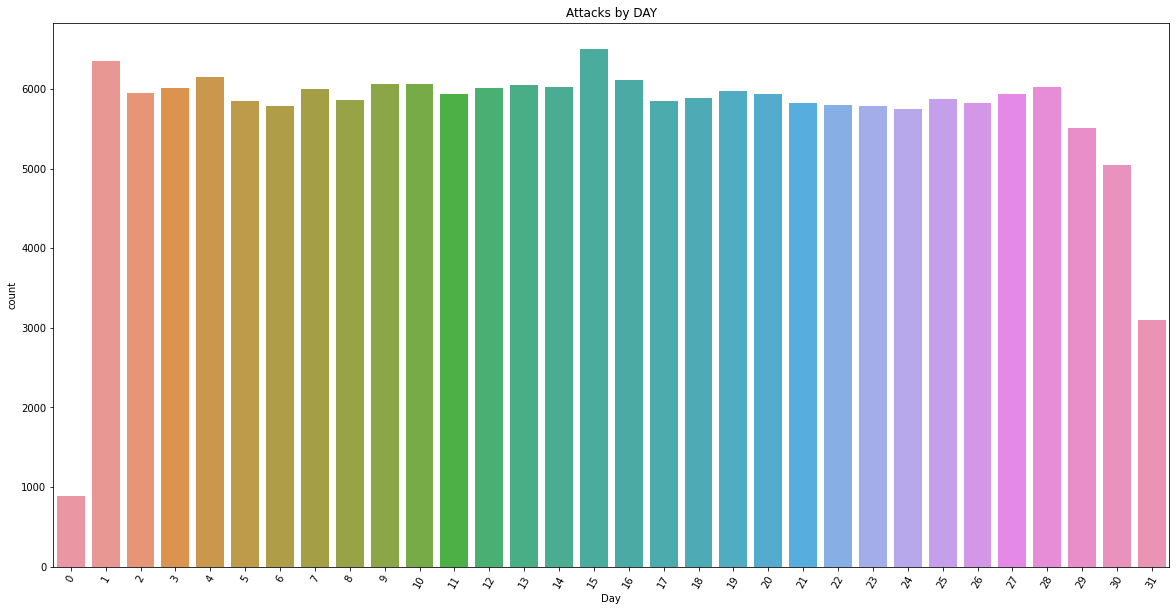

In [13]:
plt.figure(figsize=(20,10))
plt.xticks(rotation = 60)
plt.title('Attacks by DAY')
plt.xlabel('Day')
plt.ylabel('Number of Attacks')
sns.countplot(x=data.Day)

## Group which most attack

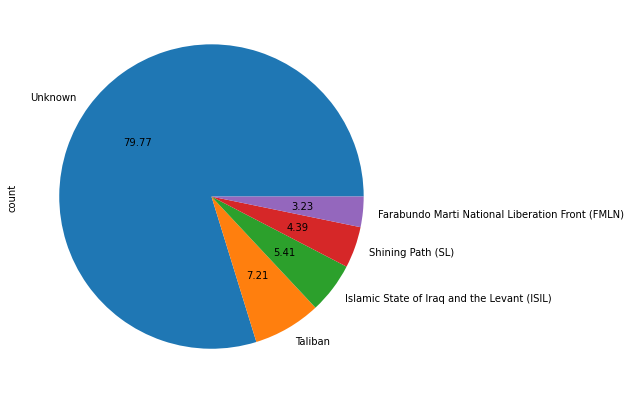

In [14]:
plt.figure(figsize=(13,7))
data['Group_Name'].value_counts().head(5).plot(kind='pie',autopct='%.2f')
plt.show()

## Attack by Weapon

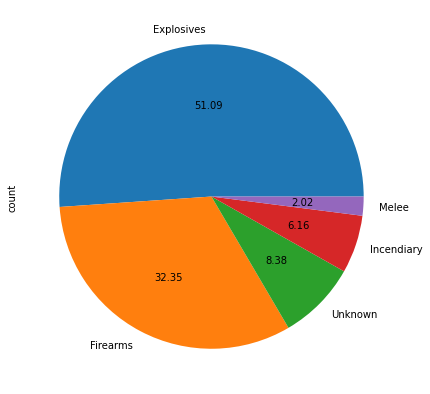

In [15]:
plt.figure(figsize=(13,7))
data['Weapon_Type'].value_counts().head(5).plot(kind='pie',autopct='%.2f')
plt.show()

## Attack by Region

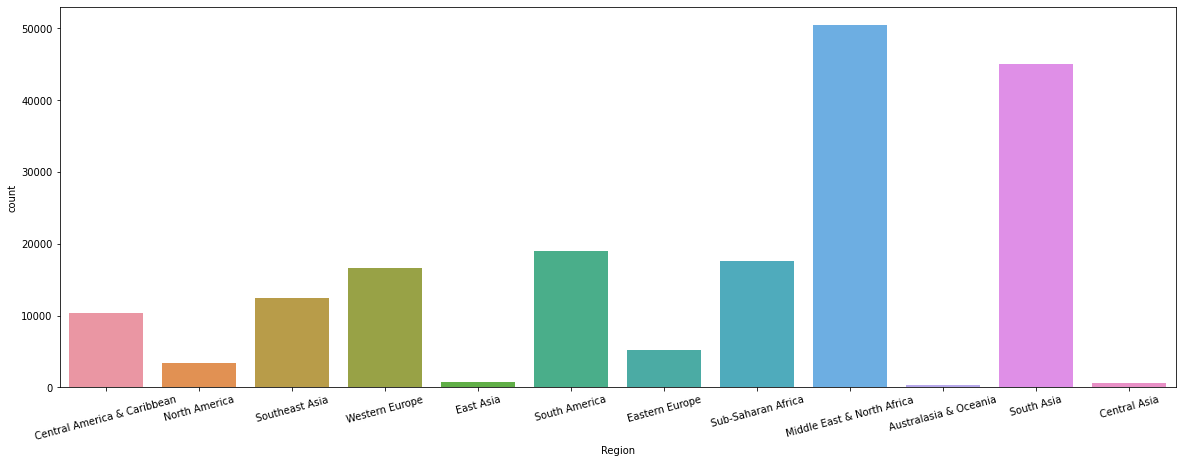

In [16]:
plt.figure(figsize=(20,7))
sns.countplot(x=data.Region)
plt.xticks(rotation=15)
plt.show()

## Attack type

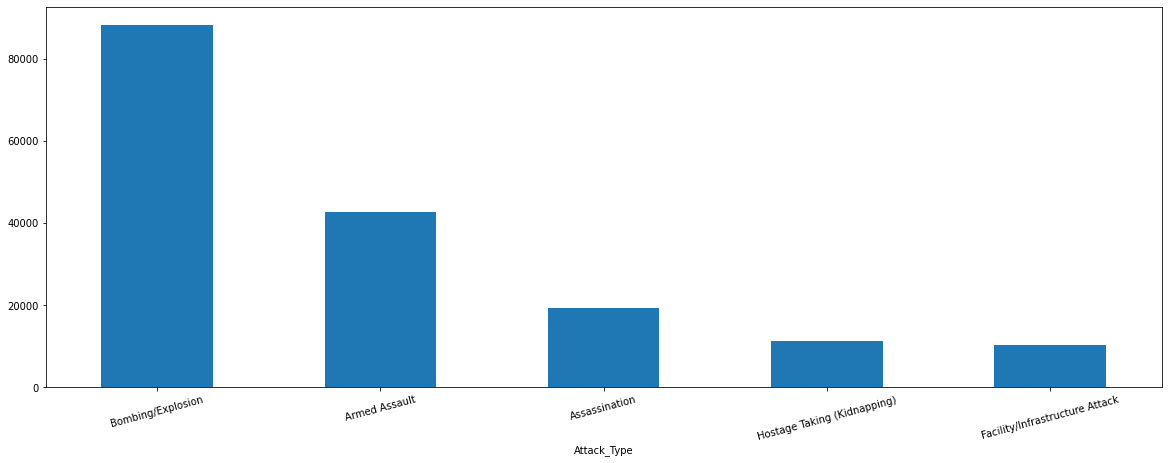

In [17]:
plt.figure(figsize=(20,7))
data['Attack_Type'].value_counts().head(5).plot(kind='bar')
plt.xticks(rotation=15)
plt.show()

## Countries affected by attacks

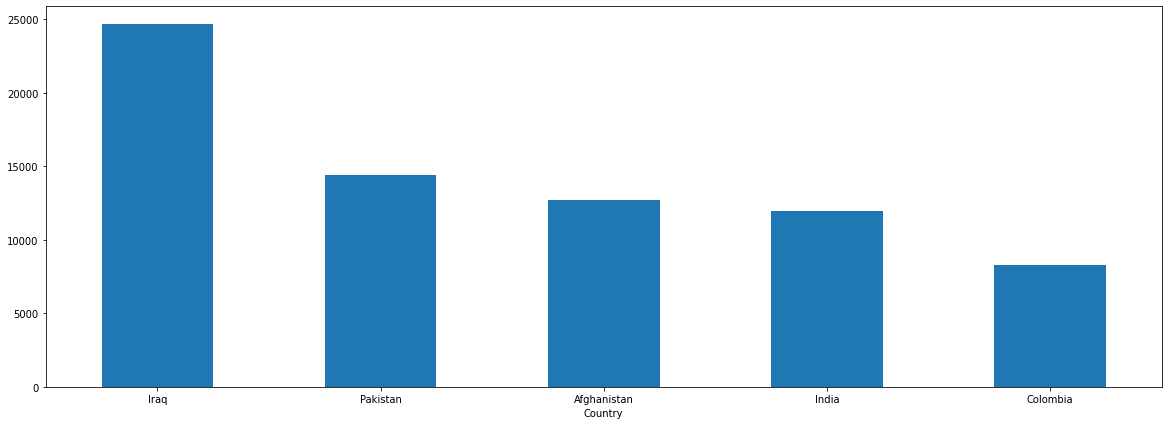

In [18]:
plt.figure(figsize=(20,7))
data['Country'].value_counts().head(5).plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

### Conclusions :-
* In 2014 most of attacks happened and Middle east is affected region.
* Group of most active attack is unknown but second is Taliban.
* Frequently used weapon is Bombing/Explosion.
* In countries, Iraq has more affected by attacks.